In [3]:
import numpy as np
import pandas as pd
pd.set_option('max_rows',38)
pd.set_option('max_columns',25)
import myslack
import pickle
# Plotting Decision tree
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

# model
from scipy.sparse import csr_matrix
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report

# Data Check

#### - train.csv

In [4]:
%%time
train = pickle.load(open("./data/final_train_Ver3.pkl", "rb"))
print("test data shape: "+str(train.shape))

test data shape: (95674, 5494)
CPU times: user 337 ms, sys: 940 ms, total: 1.28 s
Wall time: 1.32 s


#### - test.csv

In [5]:
%%time
test = pickle.load(open("./data/final_test_Ver3.pkl", "rb"))
print("test data shape: "+str(test.shape))

test data shape: (95674, 5493)
CPU times: user 263 ms, sys: 806 ms, total: 1.07 s
Wall time: 1.26 s


#### - sample_submission.csv

In [6]:
samplesub = pd.read_csv("./data/sample_submission.csv")
print("sample_submission data shape: "+str(samplesub.shape))

sample_submission data shape: (95674, 39)


---

# Modeling 1 - Multinomial Naive Bayes

In [9]:
# in test, not in train
not_in_train = [i for i in test.columns if i not in train.columns[1:]]

In [10]:
# in train, not in test
not_in_test = [i for i in train.columns[1:] if i not in test.columns]

In [11]:
len(not_in_train)

328

In [12]:
len(not_in_test)

328

In [13]:
train.drop(columns=not_in_test,inplace=True)

In [14]:
train.shape

(95674, 5166)

In [15]:
test.drop(columns=not_in_train,inplace=True)

In [16]:
test.shape

(95674, 5165)

### Train_X, Train_y

In [22]:
X = train.drop(columns='TripType')
y = train['TripType']

In [18]:
X = csr_matrix(X); X

<95674x5165 sparse matrix of type '<class 'numpy.float64'>'
	with 2214766 stored elements in Compressed Sparse Row format>

In [19]:
csr_test = csr_matrix(test); csr_test

<95674x5165 sparse matrix of type '<class 'numpy.float64'>'
	with 2221183 stored elements in Compressed Sparse Row format>

### Multinomial Naive Bayes

In [23]:
%%time
MultinomialNB_model = MultinomialNB().fit(X, y)

ValueError: Input X must be non-negative

### Cross Vaildation - Kfold

In [53]:
# def score():
#     MultinomialNB_model = MultinomialNB().fit(X, y)
#     cv = KFold(n_splits=5, shuffle=True, random_state=0)
#     return cross_val_score(decision_tree_model, X, y, cv=cv)

# score()

In [62]:
# %%time

# score_list=[]
# for i in tqdm(range(1,25)):
#     score_list.append(score(i).mean())

100%|██████████| 24/24 [04:13<00:00, 10.56s/it]

CPU times: user 4min 7s, sys: 5.98 s, total: 4min 13s
Wall time: 4min 13s


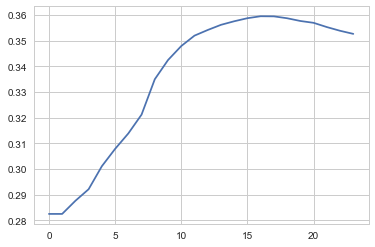

In [63]:
# plt.plot(score_list)
# plt.show()

### Confusion Matrix

In [136]:
confusion_matrix(y, MultinomialNB_model.predict(X))

array([[3496,    0,    9, ...,    0,    0,   12],
       [   0,    8,  270, ...,    0,    0,    0],
       [   1,    0, 3883, ...,    1,    4,    3],
       ...,
       [   0,    0,   29, ...,  108,   57,    2],
       [   1,    0,   11, ...,   10,  482,    1],
       [ 547,    2,  108, ...,    0,    3, 5514]])

### Train Test Split

In [121]:
X_train, X_test, y_train, y_test \
= train_test_split(X, y, test_size=0.1, random_state=1)

len(X_train), len(X_test), len(y_train), len(y_test)

(86106, 9568, 86106, 9568)

In [126]:
y_pred = MultinomialNB_model.predict(X_test)

In [128]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          3       0.82      0.96      0.88       357
          4       1.00      0.04      0.07        28
          5       0.81      0.82      0.82       472
          6       0.80      0.68      0.74       139
          7       0.71      0.72      0.71       544
          8       0.62      0.41      0.49      1186
          9       0.61      0.38      0.47       911
         12       0.33      0.14      0.20        21
         15       0.38      0.63      0.47        91
         18       0.56      0.59      0.57        63
         19       1.00      0.29      0.45        41
         20       0.38      0.65      0.48        51
         21       0.51      0.86      0.64        84
         22       0.58      0.64      0.61       106
         23       0.75      0.19      0.30        16
         24       0.51      0.72      0.59       235
         25       0.55      0.79      0.65       371
         26       0.41      0.44      0.43   

### Prediction

In [120]:
%%time
result = MultinomialNB_model.predict_proba(test)

CPU times: user 9.49 s, sys: 3.93 s, total: 13.4 s
Wall time: 7.12 s


In [115]:
result.shape

(95674, 38)

In [116]:
result

array([[7.93135986e-09, 6.07770997e-09, 2.48693058e-04, ...,
        6.94907509e-04, 5.86397599e-03, 3.07477597e-02],
       [7.35991613e-08, 5.42565832e-11, 3.17108659e-08, ...,
        4.44888894e-07, 1.21199051e-06, 1.12673709e-06],
       [1.65085065e-05, 9.58416595e-06, 1.10326467e-02, ...,
        1.24354779e-03, 1.28595949e-02, 1.14078452e-02],
       ...,
       [2.67990314e-03, 2.32468771e-04, 2.29197532e-02, ...,
        6.38100305e-03, 1.07293748e-02, 1.94170327e-02],
       [1.52084077e-30, 1.21131335e-30, 2.36921624e-22, ...,
        5.95372518e-14, 5.63464752e-10, 1.05804889e-16],
       [3.93465003e-15, 2.97463703e-18, 1.79001438e-14, ...,
        5.56982964e-07, 4.05626761e-04, 1.16488902e-04]])

### Make Submission CSV file

In [117]:
samsub = pd.read_csv('./data/sample_submission.csv')
subform_df_columns = samsub.columns[1:]
result_df = pd.DataFrame(result)
result_df.columns = subform_df_columns
subform_df = pd.concat([test.reset_index()['VisitNumber'],result_df],axis=1)
subform_df.set_index('VisitNumber',inplace=True)
subform_df.tail()

,TripType_3,TripType_4,TripType_5,TripType_6,TripType_7,TripType_8,TripType_9,TripType_12,TripType_14,TripType_15,TripType_18,TripType_19,...,TripType_34,TripType_35,TripType_36,TripType_37,TripType_38,TripType_39,TripType_40,TripType_41,TripType_42,TripType_43,TripType_44,TripType_999
VisitNumber,,,,,,,,,,,,,,,,,,,,,,,,,
191338,9.142019e-21,2.063337e-18,2.867169e-11,1.054744e-08,2.118473e-09,1.092410e-14,2.961343e-19,5.280703e-08,6.178288e-38,6.157751e-07,4.513866e-10,7.872877e-14,...,5.794856e-07,4.013893e-02,2.376623e-09,4.800862e-11,5.701254e-07,1.607884e-06,1.664788e-06,4.830728e-09,1.226674e-08,1.147341e-07,3.046652e-06,2.796587e-12
191339,2.826656e-10,3.722499e-12,9.763241e-08,8.581142e-09,7.141616e-07,2.548743e-12,7.405929e-09,8.455268e-07,8.694404e-25,3.489807e-05,8.333411e-05,4.759525e-09,...,2.941543e-05,3.573288e-04,1.462949e-07,2.586968e-08,1.292770e-05,5.771854e-05,1.333720e-05,1.059452e-04,6.580898e-03,3.300672e-04,2.432062e-04,2.701112e-06
191340,2.679903e-03,2.324688e-04,2.291975e-02,2.593565e-02,2.440484e-02,3.051212e-02,7.502693e-03,1.173680e-03,1.173048e-09,1.749940e-02,7.656956e-03,1.230357e-04,...,7.630872e-03,4.206655e-01,3.630908e-02,6.072914e-03,2.533362e-02,1.063102e-01,3.045030e-02,4.554978e-03,2.833176e-02,6.381003e-03,1.072937e-02,1.941703e-02
191341,1.520841e-30,1.211313e-30,2.369216e-22,4.262501e-22,4.136732e-21,5.891036e-32,1.731415e-26,1.027276e-15,1.027035e-49,1.332375e-11,7.487770e-15,1.655537e-21,...,6.618188e-17,6.487856e-16,4.751099e-17,4.022958e-21,2.504823e-18,1.430179e-16,5.459430e-17,1.434226e-10,1.165125e-10,5.953725e-14,5.634648e-10,1.058049e-16
191348,3.934650e-15,2.974637e-18,1.790014e-14,6.470745e-12,4.175753e-16,3.128293e-25,6.309986e-11,3.691209e-10,2.469224e-32,3.131686e-10,2.372555e-09,3.388030e-11,...,2.111206e-10,1.130940e-11,1.480156e-11,8.837041e-17,1.592513e-16,9.653352e-11,2.034549e-11,4.429320e-01,1.428023e-04,5.569830e-07,4.056268e-04,1.164889e-04


In [ ]:
subform_df.to_csv('./NaiveBayes/MNB_ver_1.csv')

---